In [1]:
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('data.csv')

In [3]:
print(df.head())

   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract Pape

##EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce') # errors = 'coerce' --> Converts non-numeric values to NaN.

In [6]:
df['TotalCharges'].dtype

dtype('float64')

In [7]:
y = df['Churn']

In [8]:
X = df.drop(['Churn'], axis=1)

In [9]:
missing_values = X.isnull().sum()

In [10]:
print(missing_values)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
dtype: int64


In [11]:
clean_missing_data = df.dropna(subset=['TotalCharges'])  #Dropping missing values from TotalCharges Col.

In [12]:
cat_columns = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

In [13]:
data_encoded = pd.get_dummies(clean_missing_data, columns=cat_columns, drop_first=True)

In [14]:
from sklearn.preprocessing import StandardScaler as sc

In [15]:
scaler = sc()
num_columns = ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
data_encoded[num_columns] = scaler.fit_transform(data_encoded[num_columns])

In [16]:
data_encoded.head()

,customerID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,-0.440327,-1.280248,-1.161694,-0.994194,No,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,5575-GNVDE,-0.440327,0.064303,-0.260878,-0.173740,No,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,3668-QPYBK,-0.440327,-1.239504,-0.363923,-0.959649,Yes,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,7795-CFOCW,-0.440327,0.512486,-0.747850,-0.195248,No,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,9237-HQITU,-0.440327,-1.239504,0.196178,-0.940457,Yes,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [18]:
X = pd.get_dummies(data_encoded.drop(['customerID'], axis=1)) #Creating dummy variables for columns by dropping customerID col.

In [19]:
pca = PCA()
X_pca = pca.fit_transform(X)

In [20]:
variance_ratio = pca.explained_variance_ratio_

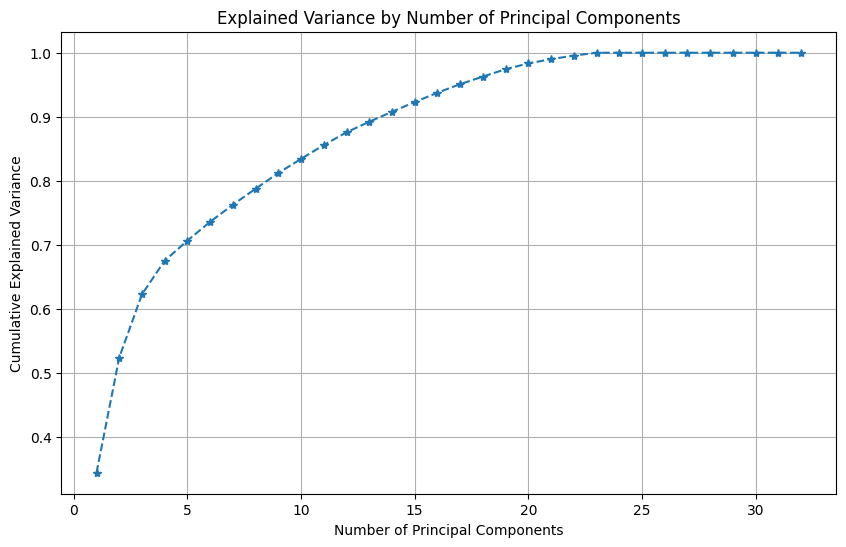

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(variance_ratio) + 1), variance_ratio.cumsum(), marker='*', linestyle='--')
plt.title('Explained Variance by Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [23]:
obj_columns = data_encoded.select_dtypes(include=['object']).columns
data_encoded = pd.get_dummies(data_encoded, columns = obj_columns, drop_first=True)

In [24]:
pca = PCA(n_components=3)

X_pca = pca.fit_transform(data_encoded)


In [25]:
dbscan = DBSCAN(eps=0.3, min_samples=3)

In [26]:
dbscan.fit(X_pca)

DBSCAN(eps=0.3, min_samples=3)

In [27]:
labels = dbscan.labels_

In [28]:
print(labels)

[0 0 0 ... 0 2 0]


In [29]:
Numbers_of_clusters = len(set(labels)) - (1 if -1 in labels else 0)
Numbers_of_noise = list(labels).count(-1)
print(f"Number of clusters: {Numbers_of_clusters}")
print(f"Number of noise points: {Numbers_of_noise }")

Number of clusters: 5
Number of noise points: 6


In [30]:
if Numbers_of_clusters > 1:
    silhouette_avg = silhouette_score(X_pca, labels)
    print(f"Silhouette Score: {silhouette_avg:.4f}")
else:
    print("Silhouette Score is not available with fewer than 2 clusters.")

Silhouette Score: 0.3832


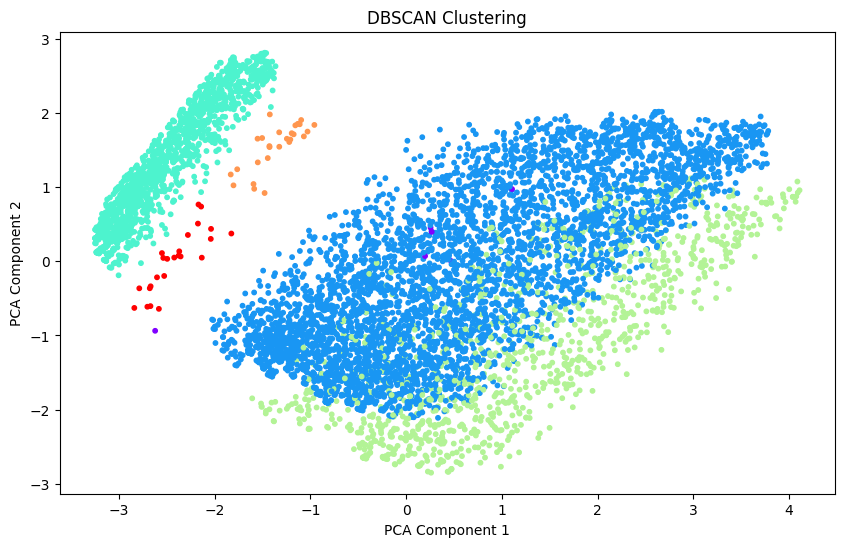

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow', s=10)
plt.title('DBSCAN Clustering')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

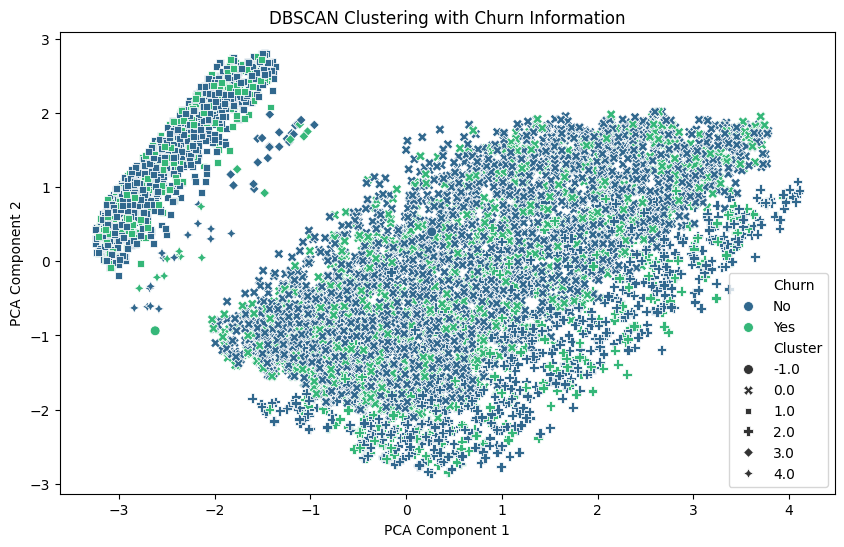

In [32]:
clustered_df = pd.concat([pd.DataFrame(X_pca), pd.DataFrame({'Cluster': labels}), y.reset_index(drop=True)], axis=1)  # Add 'Churn' to the DataFrame

plt.figure(figsize=(10, 6))
sns.scatterplot(x=clustered_df[0], y=clustered_df[1], hue=clustered_df['Churn'], style=clustered_df['Cluster'], palette='viridis', s=50)
plt.title('DBSCAN Clustering with Churn Information')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()
